## Aleatoriedad vs Caos

El objetivo es comparar una serie aleatoria con series deterministas (una periódica y dos caóticas) para ver por qué caos ≠ azar, aunque se parezcan

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt

Creación de arrays aleatorios

In [25]:
N = 1000
array_random = np.random.rand(N)

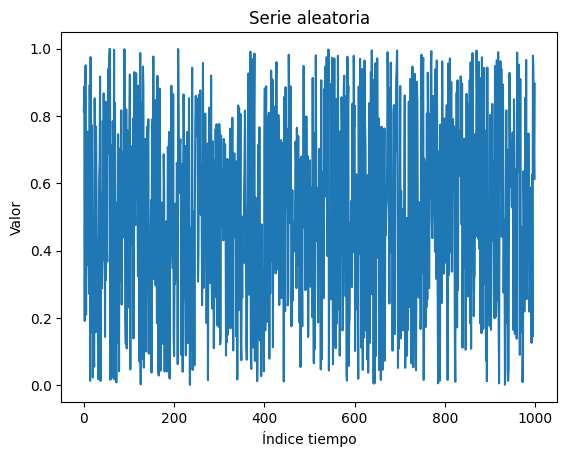

In [26]:
plt.plot(array_random)
plt.title("Serie aleatoria")
plt.xlabel("Índice tiempo")
plt.ylabel("Valor")
plt.show()

Como se ve, el array es aleatorio, no sigue ninguna estructura clara. Ahora creamos una serie determinista simple (en este caso sin(n)) para comparar la serie aleatoria y la serie determinista.

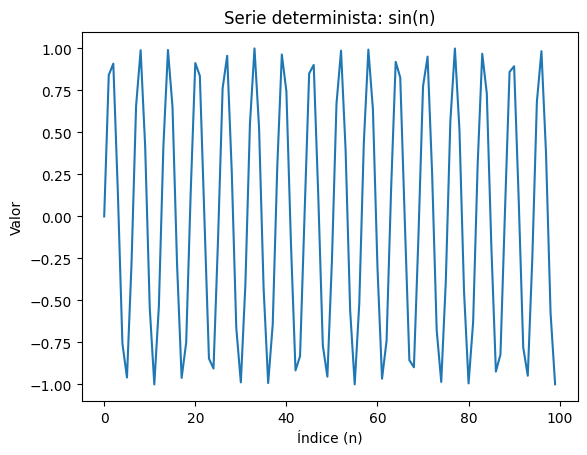

In [27]:
N_visual = 100
n = np.arange(N_visual)
serie_determinista = np.sin(n)
plt.plot(serie_determinista)
plt.title("Serie determinista: sin(n)")
plt.xlabel("Índice (n)")
plt.ylabel("Valor")
plt.show()


Para valores grandes de N, la representación gráfica de series periódicas puede ocultar su estructura debido a la densidad de puntos. Por ello, para visualizar correctamente el comportamiento periódico, se utiliza un número reducido de iteraciones. Con esto se visualiza en la gráfica que hay una estructura clara y un comportamiento periódico.

### Comparación entre serie aleatoria y determinista

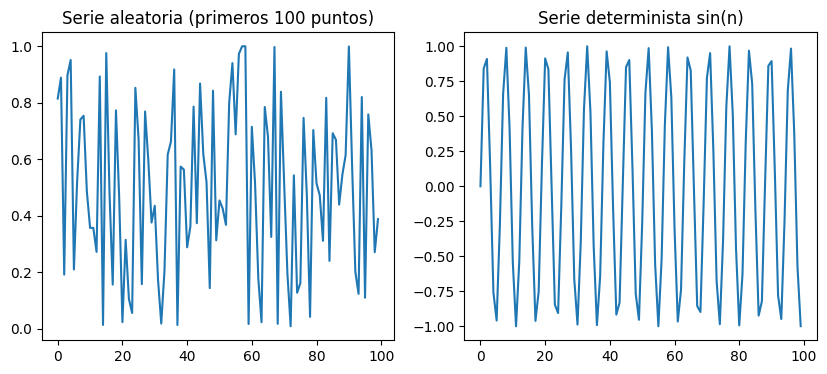

In [28]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(array_random[:100])
plt.title("Serie aleatoria (primeros 100 puntos)")

plt.subplot(1,2,2)
plt.plot(serie_determinista)
plt.title("Serie determinista sin(n)")

plt.show()


### Mapa logístico: primer sistema caótico 


In [29]:
r = 3.9
x0 = 0.2
N = 1000

x = np.zeros(N)
x[0] = x0

for i in range(N - 1):
    x[i + 1] = r * x[i] * (1 - x[i])


Para poder visualizarlo usamos un N reducido

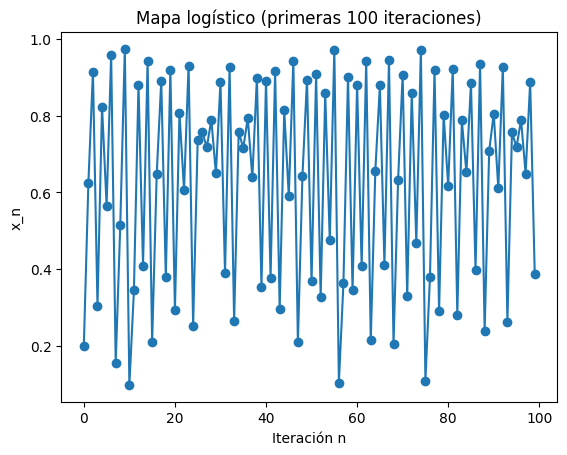

In [30]:
plt.plot(x[:100], marker='o')
plt.title("Mapa logístico (primeras 100 iteraciones)")
plt.xlabel("Iteración n")
plt.ylabel("x_n")
plt.show()


### Comportamiento del mapa logístico

Al representar únicamente las primeras iteraciones del mapa logístico se observa que, a pesar de la irregularidad aparente de la serie, el sistema permanece acotado y sigue una regla determinista bien definida. Esta representación local permite apreciar que el comportamiento no es puramente aleatorio, sino el resultado de una dinámica no lineal.

La complejidad observada en esta serie contrasta con el carácter periódico de sistemas deterministas simples y sugiere la presencia de un régimen caótico para determinados valores del parámetro \( r \).


In [31]:
x0_1 = 0.2
x0_2 = 0.200001

x1 = np.zeros(N)
x2 = np.zeros(N)

x1[0] = x0_1
x2[0] = x0_2

for i in range(N - 1):
    x1[i + 1] = r * x1[i] * (1 - x1[i])
    x2[i + 1] = r * x2[i] * (1 - x2[i])


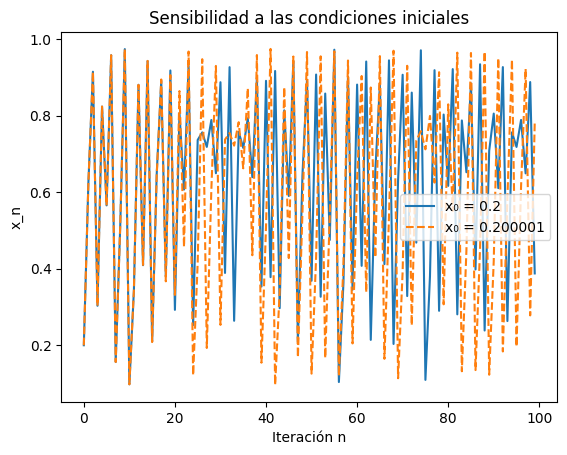

In [32]:
plt.plot(x1[:100], label="x₀ = 0.2")
plt.plot(x2[:100], label="x₀ = 0.200001", linestyle="--")
plt.title("Sensibilidad a las condiciones iniciales")
plt.xlabel("Iteración n")
plt.ylabel("x_n")
plt.legend()
plt.show()


### Sensibilidad a las condiciones iniciales

Al comparar dos trayectorias del mapa logístico con condiciones iniciales muy próximas, se observa que ambas evolucionan de forma similar únicamente durante las primeras iteraciones. Sin embargo, tras un número reducido de pasos, las trayectorias divergen significativamente.

Este fenómeno, conocido como sensibilidad a las condiciones iniciales, es una característica fundamental de los sistemas caóticos. A pesar de estar gobernado por una ecuación determinista, el sistema presenta una evolución impredecible a largo plazo, lo que puede dar lugar a un comportamiento aparentemente aleatorio.


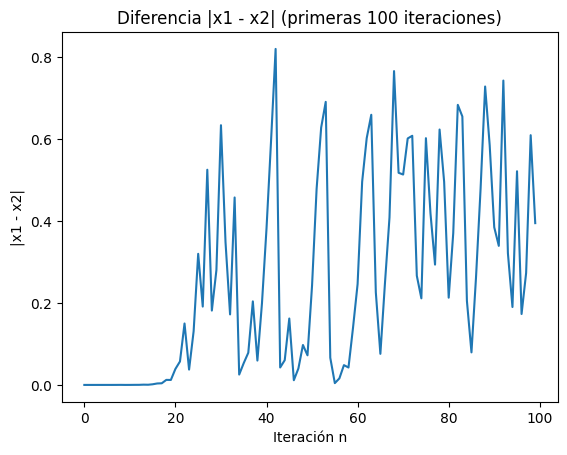

In [33]:
diff = np.abs(x1 - x2)
plt.plot(diff[:100])
plt.title("Diferencia |x1 - x2| (primeras 100 iteraciones)")
plt.xlabel("Iteración n")
plt.ylabel("|x1 - x2|")
plt.show()


### Divergencia entre trayectorias cercanas

Se ha representado la diferencia absoluta \(|x_1 - x_2|\) entre dos trayectorias del mapa logístico con condiciones iniciales muy próximas. Se observa que, tras unas pocas iteraciones, la diferencia crece rápidamente hasta alcanzar valores comparables con el propio rango de la variable.

Este resultado pone de manifiesto que pequeñas diferencias en el estado inicial pueden amplificarse significativamente con el tiempo, lo que constituye una característica esencial de los sistemas caóticos.


## Péndulo doble

### Trayectoria del péndulo doble

Se representa la trayectoria de la segunda masa del péndulo doble obtenida mediante integración numérica de sus ecuaciones de movimiento. Aunque el sistema está gobernado por leyes deterministas de la mecánica clásica, la trayectoria resultante puede mostrar un comportamiento irregular y complejo, característico de dinámicas no lineales.

In [34]:
#Parámetros
g = 9.81
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0
dt = 0.01
T = 20.0
steps = int(T / dt)
theta1_0 = 1.0
theta2_0 = 1.2
omega1_0 = 0.0
omega2_0 = 0.0

def deriv(state):

    theta1, omega1, theta2, omega2 = state

    # Diferencia entre ángulos
    delta = theta1 - theta2

    # Resistencia a moverse
    den1 = l1 * (2*m1 + m2 - m2*np.cos(2*delta))
    den2 = l2 * (2*m1 + m2 - m2*np.cos(2*delta))

    # Derivadas de los ángulos = velocidad angular
    dtheta1 = omega1
    dtheta2 = omega2

    # Aceleración angular del primer péndulo = fuerzas / resistencia a girar

    domega1 = (
        -g*(2*m1 + m2)*np.sin(theta1)                 # gravedad
        - m2*g*np.sin(theta1 - 2*theta2)               # influencia del segundo péndulo
        - 2*np.sin(delta)*m2*(
            omega2**2*l2 + omega1**2*l1*np.cos(delta)  # efectos del giro
        )
    ) / den1

    # Aceleración angular del segundo péndulo = fuerzas / resistencia a girar
    domega2 = (
        2*np.sin(delta) * (
            omega1**2*l1*(m1 + m2)          # arrastre por el giro del primer péndulo
            + g*(m1 + m2)*np.cos(theta1)    # gravedad
            + omega2**2*l2*m2*np.cos(delta) # efectos del giro
        )
    ) / den2

    return np.array([dtheta1, domega1, dtheta2, domega2], dtype=float)




### Método de Runge–Kutta de cuarto orden (RK4)

Se utiliza el método RK4 para avanzar el sistema en el tiempo de forma precisa. Este método mejora a Euler porque no supone que el sistema cambia siempre igual dentro de cada paso temporal.


In [35]:
def rk4_step(state, dt):
    k1 = deriv(state)
    k2 = deriv(state + 0.5*dt*k1)
    k3 = deriv(state + 0.5*dt*k2)
    k4 = deriv(state + dt*k3)
    return state + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

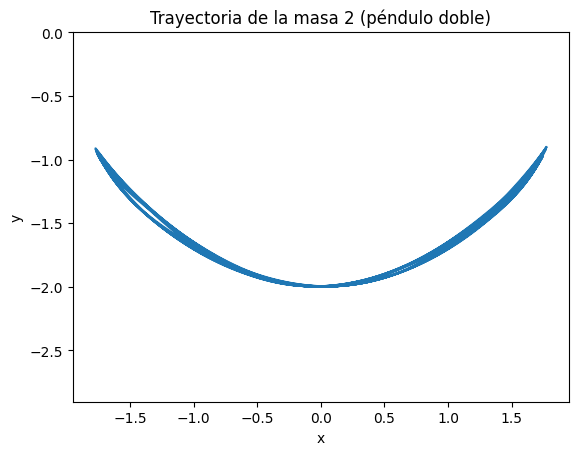

In [36]:
state = np.array([theta1_0, omega1_0, theta2_0, omega2_0], dtype=float)

x2 = np.zeros(int(steps))
y2 = np.zeros(int(steps))

for i in range(int(steps)):
    theta1, omega1, theta2, omega2 = state

    # Posiciones
    x1 = l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2[i] = x1 + l2*np.sin(theta2)
    y2[i] = y1 - l2*np.cos(theta2)

    state = rk4_step(state, dt)

plt.plot(x2, y2)
plt.title("Trayectoria de la masa 2 (péndulo doble)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()



### Cambio de condiciones iniciales

En la simulación anterior se observa que el sistema presenta un comportamiento relativamente regular, sin mostrar aún un régimen claramente caótico. Por este motivo, se repite la simulación modificando las condiciones iniciales, con el objetivo de analizar cómo influyen en la dinámica del péndulo doble y poner de manifiesto posibles comportamientos caóticos.


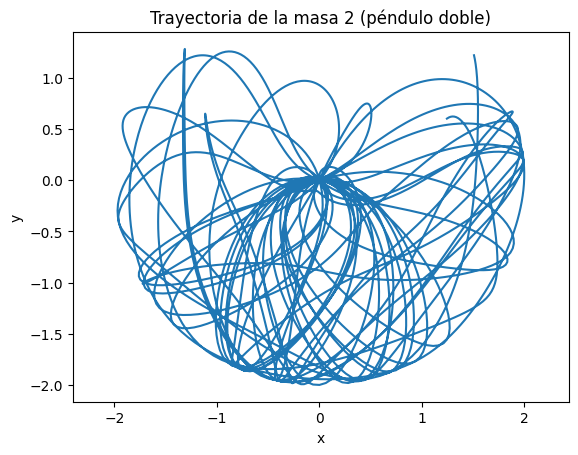

In [37]:
# Parámetros (solo si quieres cambiarlos respecto a antes)
T = 40.0
steps = int(T / dt)

# Nuevas condiciones iniciales (experimento)
theta1_0 = 2.0
theta2_0 = 2.5
omega1_0 = 0.0
omega2_0 = 0.0

state = np.array([theta1_0, omega1_0, theta2_0, omega2_0], dtype=float)

x2 = np.zeros(steps)
y2 = np.zeros(steps)

for i in range(steps):
    theta1, omega1, theta2, omega2 = state

    # Posiciones
    x1 = l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2[i] = x1 + l2*np.sin(theta2)
    y2[i] = y1 - l2*np.cos(theta2)

    state = rk4_step(state, dt)

plt.plot(x2, y2)
plt.title("Trayectoria de la masa 2 (péndulo doble)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Influencia de las condiciones iniciales

Como se observa en la figura, pequeños cambios en las condiciones iniciales producen trayectorias muy diferentes en el péndulo doble. A pesar de que el sistema está gobernado por ecuaciones deterministas, su evolución cambia de forma notable al modificar ligeramente el estado inicial.

Este comportamiento pone de manifiesto la fuerte dependencia del sistema respecto a las condiciones iniciales, característica típica de los sistemas caóticos.


### Reproducibilidad: azar frente a caos

En esta sección se estudia una de las diferencias fundamentales entre un sistema aleatorio y uno caótico: la reproducibilidad. A primera vista, ambos pueden generar comportamientos irregulares y difíciles de predecir, pero su naturaleza es distinta.

En el caso de los procesos aleatorios, la evolución del sistema no está completamente determinada. Si no se fija una semilla, dos ejecuciones distintas producen resultados diferentes, ya que interviene el azar. Solo al fijar la semilla se puede forzar que el resultado sea reproducible.

Por el contrario, los sistemas caóticos son deterministas: su evolución está completamente determinada por las ecuaciones del sistema y las condiciones iniciales. Esto implica que, si se parte exactamente del mismo estado inicial, el sistema produce siempre la misma evolución, aunque esta pueda parecer desordenada o impredecible a largo plazo.

Mediante estos ejemplos se muestra que el caos no es sinónimo de aleatoriedad, sino el resultado de sistemas deterministas muy sensibles a las condiciones iniciales.


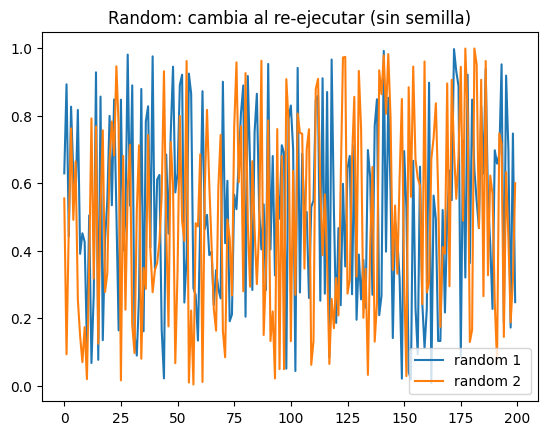

In [39]:
N = 200

rand1 = np.random.rand(N)
rand2 = np.random.rand(N)

plt.figure()
plt.plot(rand1, label="random 1")
plt.plot(rand2, label="random 2 ")
plt.title("Random: cambia al re-ejecutar (sin semilla)")
plt.legend()
plt.show()

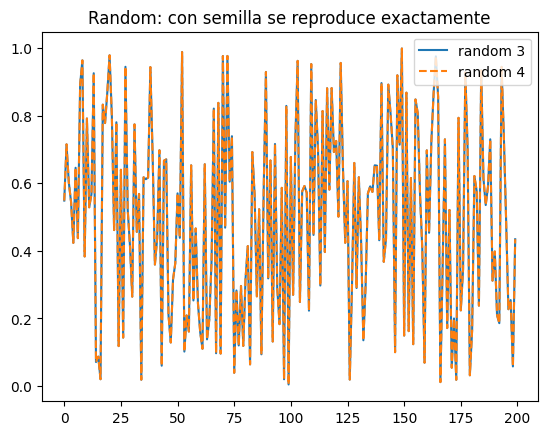

In [40]:
np.random.seed(0)
rand3 = np.random.rand(N)

np.random.seed(0)
rand4 = np.random.rand(N)

plt.figure()
plt.plot(rand3, label="random 3")
plt.plot(rand4, "--", label="random 4")
plt.title("Random: con semilla se reproduce exactamente")
plt.legend()
plt.show()


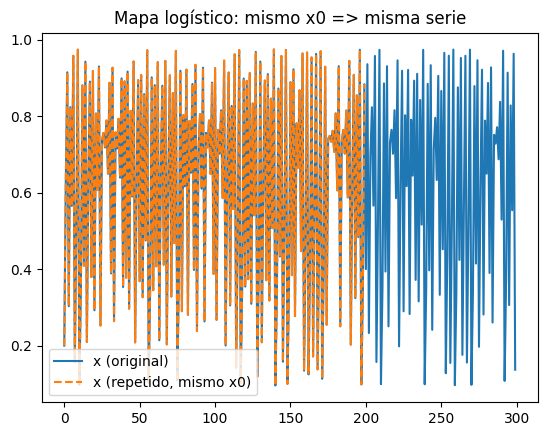

In [41]:
x_rep = np.zeros(N)
x_rep[0] = x0
for i in range(N - 1):
    x_rep[i + 1] = r * x_rep[i] * (1 - x_rep[i])

plt.figure()
plt.plot(x[:300], label="x (original)")
plt.plot(x_rep[:300], "--", label="x (repetido, mismo x0)")
plt.title("Mapa logístico: mismo x0 => misma serie")
plt.legend()
plt.show()

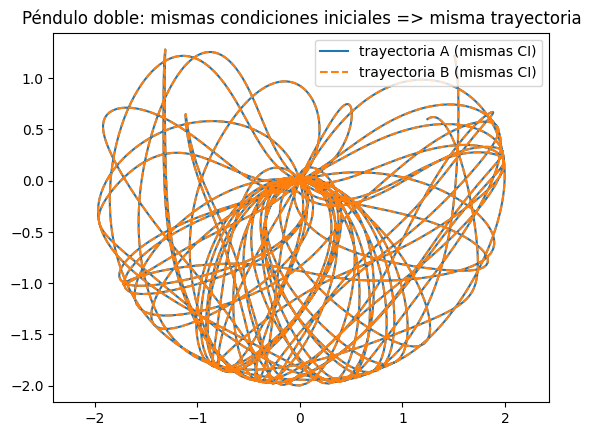

In [42]:
def sim_pendulo(theta1_0, omega1_0, theta2_0, omega2_0):
    state = np.array([theta1_0, omega1_0, theta2_0, omega2_0], dtype=float)
    x2 = np.zeros(int(steps))
    y2 = np.zeros(int(steps))

    for i in range(int(steps)):
        theta1, omega1, theta2, omega2 = state

        # Posiciones
        x1 = l1*np.sin(theta1)
        y1 = -l1*np.cos(theta1)
        x2[i] = x1 + l2*np.sin(theta2)
        y2[i] = y1 - l2*np.cos(theta2)

        state = rk4_step(state, dt)

    return x2, y2


x2_A, y2_A = sim_pendulo(theta1_0, omega1_0, theta2_0, omega2_0)
x2_B, y2_B = sim_pendulo(theta1_0, omega1_0, theta2_0, omega2_0)

plt.figure()
plt.plot(x2_A, y2_A, label="trayectoria A (mismas CI)")
plt.plot(x2_B, y2_B, "--", label="trayectoria B (mismas CI)")
plt.title("Péndulo doble: mismas condiciones iniciales => misma trayectoria")
plt.axis("equal")
plt.legend()
plt.show()

## Conclusiones

En este proyecto se ha estudiado la diferencia entre comportamiento aleatorio y caótico mediante simulaciones numéricas sencillas. Aunque ambos tipos de sistemas pueden generar series irregulares y difíciles de predecir, los resultados muestran que su naturaleza es distinta.

En los procesos aleatorios, la evolución del sistema no está completamente determinada. Cada ejecución genera resultados diferentes si no se fija una semilla, lo que indica que interviene el azar. No existe una relación directa entre valores consecutivos de la serie, y el comportamiento no es reproducible de forma natural.

Por el contrario, los sistemas caóticos analizados (mapa logístico y péndulo doble) son completamente deterministas. Al repetir las simulaciones con las mismas condiciones iniciales se obtiene siempre la misma evolución, lo que demuestra que no interviene ningún elemento aleatorio. Sin embargo, pequeñas variaciones en las condiciones iniciales producen trayectorias muy diferentes, lo que explica su comportamiento aparentemente impredecible.

Las gráficas obtenidas muestran que, aunque el caos puede parecer aleatorio a simple vista, conserva una estructura interna y una dependencia clara de las condiciones iniciales. Esto permite distinguir entre azar y caos, incluso cuando ambos generan señales desordenadas.

En conclusión, el caos no es sinónimo de aleatoriedad: se trata de un comportamiento determinista extremadamente sensible a las condiciones iniciales, mientras que el azar carece de una regla subyacente que determine su evolución.
